# Session 3: The Intelligent Engineer (Classification)
**Objective**: Apply supervised machine learning (KNN vs Decision Tree) to classify equipment health status.

## Task 3: Data Prep & KNN
Loading the AI4I Predictive Maintenance dataset and training a K-Nearest Neighbors model.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.set_theme(style="whitegrid")


In [8]:
# Load AI4I Dataset
df = pd.read_csv('../data/ai4i2020.csv')

# Feature Selection
features = ['Rotational speed [rpm]', 'Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Machine failure'

X = df[features]
y = df[target]

print("Features:", X.shape)
print("Target Distribution:\n", y.value_counts())


Features: (10000, 4)
Target Distribution:
 Machine failure
0    9661
1     339
Name: count, dtype: int64


In [9]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale Features (Critical for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# 1. Train K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9735

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.80      0.29      0.43        68

    accuracy                           0.97      2000
   macro avg       0.89      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



## Task 4: Decision Tree Classifier
Training a Decision Tree model and comparing performance.


In [11]:
# 2. Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)  # Tree doesn't strictly need scaling, but we use raw features here

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9745

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.81      0.32      0.46        68

    accuracy                           0.97      2000
   macro avg       0.90      0.66      0.73      2000
weighted avg       0.97      0.97      0.97      2000



## Task 5: Model Selection
Comparing the two models.


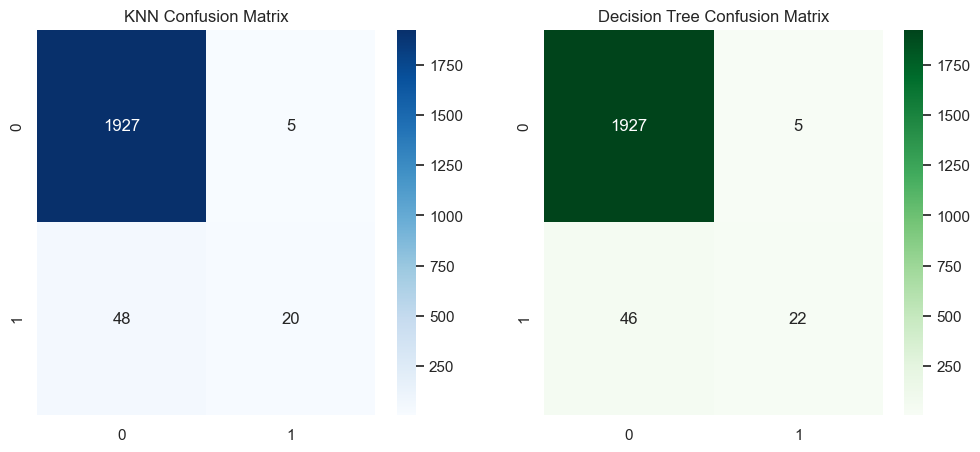

In [12]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')

plt.show()


### Conclusion
- **KNN**: Sensitive to feature scaling. Good for non-linear boundaries but slower at inference time with large datasets.
- **Decision Tree**: Highly interpretable (if-then rules). Fast inference. 
- **Recommendation**: For this dataset, observe which model has better Recall for class 1 (Failures). In maintenance, catching a failure (Recall) is often more important than overall Accuracy.
